In [1]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [3]:
path = get_path('hntn_train_validate_and_test_wn18_200d_cost.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_cost.csv'

In [4]:
results_cost = pd.read_csv(path)
results_cost.head()

,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0.008311,0.008337,0.008247,NaN,NaN,NaN
1,0.004777,0.004840,0.004812,0.000600,0.000603,0.000603
2,0.003934,0.003921,0.003901,NaN,NaN,NaN
3,0.003924,0.003830,0.003895,0.000515,0.000553,0.000551
4,0.003502,0.003411,0.003391,NaN,NaN,NaN


In [5]:
results_cost = results_cost.reset_index()
results_cost.head()

,index,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0,0.008311,0.008337,0.008247,NaN,NaN,NaN
1,1,0.004777,0.004840,0.004812,0.000600,0.000603,0.000603
2,2,0.003934,0.003921,0.003901,NaN,NaN,NaN
3,3,0.003924,0.003830,0.003895,0.000515,0.000553,0.000551
4,4,0.003502,0.003411,0.003391,NaN,NaN,NaN


In [6]:
results_cost = results_cost.rename(columns={'index': 'epoch'})
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,0,0.008311,0.008337,0.008247,NaN,NaN,NaN
1,1,0.004777,0.004840,0.004812,0.000600,0.000603,0.000603
2,2,0.003934,0.003921,0.003901,NaN,NaN,NaN
3,3,0.003924,0.003830,0.003895,0.000515,0.000553,0.000551
4,4,0.003502,0.003411,0.003391,NaN,NaN,NaN


In [7]:
results_cost['epoch'] += 1
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_test_baseline,cost_training_hypothesis,cost_validation_hypothesis,cost_test_hypothesis
0,1,0.008311,0.008337,0.008247,NaN,NaN,NaN
1,2,0.004777,0.004840,0.004812,0.000600,0.000603,0.000603
2,3,0.003934,0.003921,0.003901,NaN,NaN,NaN
3,4,0.003924,0.003830,0.003895,0.000515,0.000553,0.000551
4,5,0.003502,0.003411,0.003391,NaN,NaN,NaN


In [8]:
results_cost = results_cost.drop(['cost_test_baseline', 'cost_test_hypothesis'], axis=1)
results_cost.head()

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_hypothesis,cost_validation_hypothesis
0,1,0.008311,0.008337,NaN,NaN
1,2,0.004777,0.004840,0.000600,0.000603
2,3,0.003934,0.003921,NaN,NaN
3,4,0.003924,0.003830,0.000515,0.000553
4,5,0.003502,0.003411,NaN,NaN


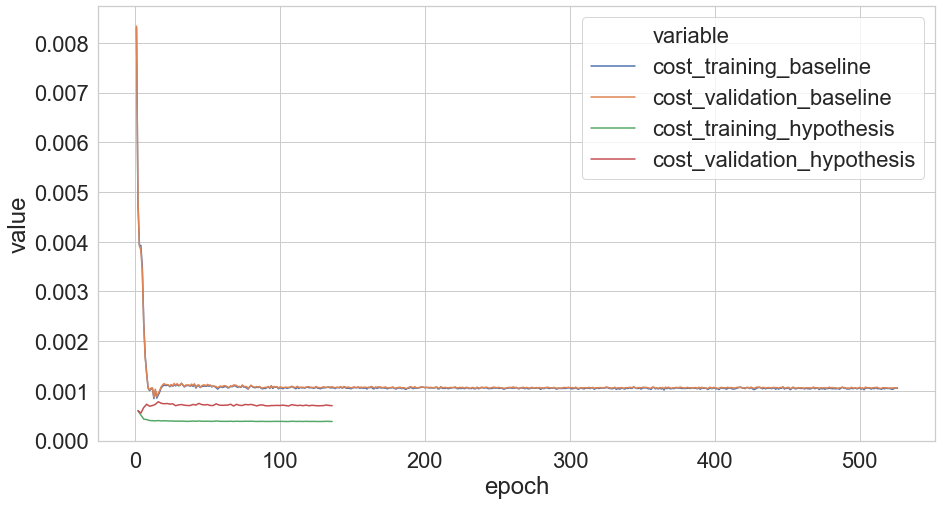

In [9]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('WN18_Cost_Results.png', bbox_inches = "tight", format='PNG')

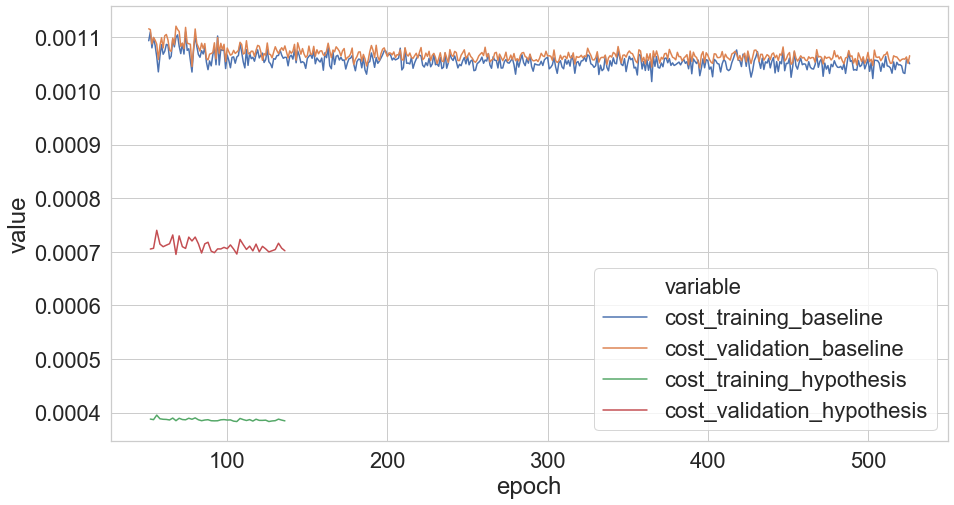

In [10]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost[50:], ['epoch']))
plt.savefig('WN18_Cost_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [11]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_10.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_10.csv'

In [12]:
results_hits_at_10 = pd.read_csv(path)
results_hits_at_10.head()

,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0.0010,0.0007,0.0008,NaN,NaN,NaN
1,0.0317,0.0341,0.0328,0.04086,0.0273,0.0270
2,0.0364,0.0364,0.0348,NaN,NaN,NaN
3,0.0368,0.0347,0.0338,0.30034,0.0998,0.0975
4,0.0405,0.0410,0.0388,NaN,NaN,NaN


In [13]:
results_hits_at_10 = results_hits_at_10.reset_index()
results_hits_at_10.head()

,index,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0,0.0010,0.0007,0.0008,NaN,NaN,NaN
1,1,0.0317,0.0341,0.0328,0.04086,0.0273,0.0270
2,2,0.0364,0.0364,0.0348,NaN,NaN,NaN
3,3,0.0368,0.0347,0.0338,0.30034,0.0998,0.0975
4,4,0.0405,0.0410,0.0388,NaN,NaN,NaN


In [14]:
results_hits_at_10 = results_hits_at_10.rename(columns={'index': 'epoch'})
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,0,0.0010,0.0007,0.0008,NaN,NaN,NaN
1,1,0.0317,0.0341,0.0328,0.04086,0.0273,0.0270
2,2,0.0364,0.0364,0.0348,NaN,NaN,NaN
3,3,0.0368,0.0347,0.0338,0.30034,0.0998,0.0975
4,4,0.0405,0.0410,0.0388,NaN,NaN,NaN


In [15]:
results_hits_at_10['epoch'] += 1
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_test_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis,hits_at_10_test_hypothesis
0,1,0.0010,0.0007,0.0008,NaN,NaN,NaN
1,2,0.0317,0.0341,0.0328,0.04086,0.0273,0.0270
2,3,0.0364,0.0364,0.0348,NaN,NaN,NaN
3,4,0.0368,0.0347,0.0338,0.30034,0.0998,0.0975
4,5,0.0405,0.0410,0.0388,NaN,NaN,NaN


In [16]:
results_hits_at_10_test = results_hits_at_10[['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis']]
results_hits_at_10_test.head()

,hits_at_10_test_baseline,hits_at_10_test_hypothesis
0,0.0008,NaN
1,0.0328,0.0270
2,0.0348,NaN
3,0.0338,0.0975
4,0.0388,NaN


In [17]:
results_hits_at_10_test.max()

hits_at_10_test_baseline      0.9574
hits_at_10_test_hypothesis    0.9556
dtype: float64

In [18]:
results_hits_at_10 = results_hits_at_10.drop(['hits_at_10_test_baseline', 'hits_at_10_test_hypothesis'], axis=1)
results_hits_at_10.head()

,epoch,hits_at_10_training_baseline,hits_at_10_validation_baseline,hits_at_10_training_hypothesis,hits_at_10_validation_hypothesis
0,1,0.0010,0.0007,NaN,NaN
1,2,0.0317,0.0341,0.04086,0.0273
2,3,0.0364,0.0364,NaN,NaN
3,4,0.0368,0.0347,0.30034,0.0998
4,5,0.0405,0.0410,NaN,NaN


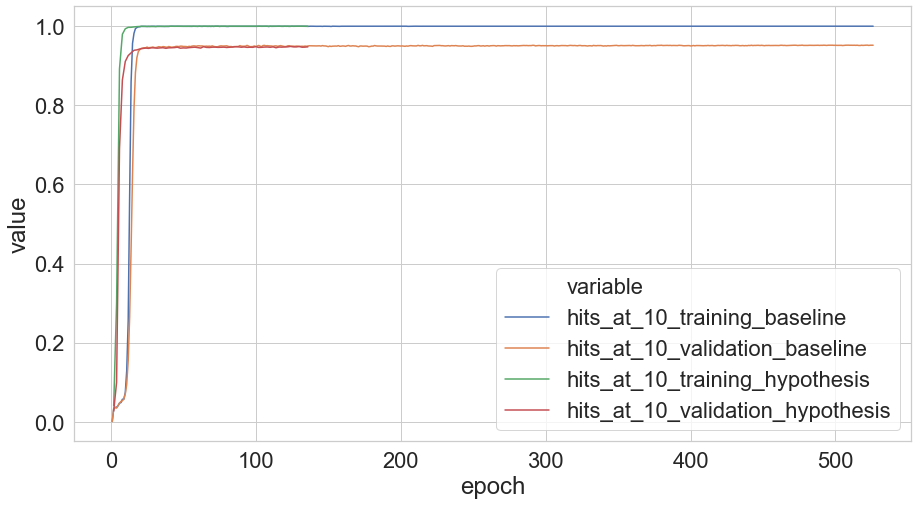

In [19]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10, ['epoch']))
plt.savefig('WN18_hits_at_10_Results.png', bbox_inches = "tight", format='PNG')

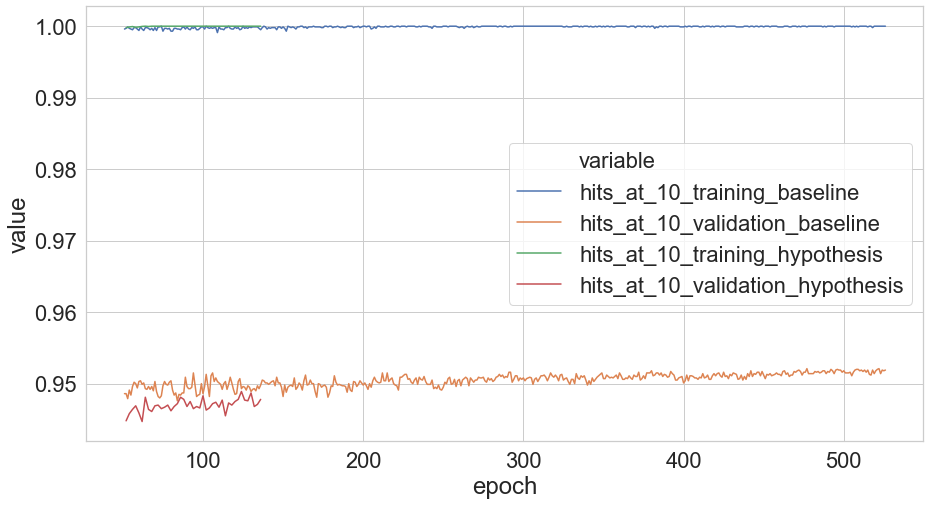

In [20]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_10[50:], ['epoch']))
plt.savefig('WN18_hits_at_10_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [21]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_3.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_3.csv'

In [22]:
results_hits_at_3 = pd.read_csv(path)
results_hits_at_3.head()

,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0.0004,0.0002,0.0000,NaN,NaN,NaN
1,0.0134,0.0147,0.0144,0.02423,0.0135,0.0134
2,0.0165,0.0142,0.0139,NaN,NaN,NaN
3,0.0151,0.0140,0.0140,0.22020,0.0682,0.0664
4,0.0199,0.0200,0.0205,NaN,NaN,NaN


In [23]:
results_hits_at_3 = results_hits_at_3.reset_index()
results_hits_at_3.head()

,index,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0,0.0004,0.0002,0.0000,NaN,NaN,NaN
1,1,0.0134,0.0147,0.0144,0.02423,0.0135,0.0134
2,2,0.0165,0.0142,0.0139,NaN,NaN,NaN
3,3,0.0151,0.0140,0.0140,0.22020,0.0682,0.0664
4,4,0.0199,0.0200,0.0205,NaN,NaN,NaN


In [24]:
results_hits_at_3 = results_hits_at_3.rename(columns={'index': 'epoch'})
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,0,0.0004,0.0002,0.0000,NaN,NaN,NaN
1,1,0.0134,0.0147,0.0144,0.02423,0.0135,0.0134
2,2,0.0165,0.0142,0.0139,NaN,NaN,NaN
3,3,0.0151,0.0140,0.0140,0.22020,0.0682,0.0664
4,4,0.0199,0.0200,0.0205,NaN,NaN,NaN


In [25]:
results_hits_at_3['epoch'] += 1
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_test_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis,hits_at_3_test_hypothesis
0,1,0.0004,0.0002,0.0000,NaN,NaN,NaN
1,2,0.0134,0.0147,0.0144,0.02423,0.0135,0.0134
2,3,0.0165,0.0142,0.0139,NaN,NaN,NaN
3,4,0.0151,0.0140,0.0140,0.22020,0.0682,0.0664
4,5,0.0199,0.0200,0.0205,NaN,NaN,NaN


In [26]:
results_hits_at_3_test = results_hits_at_3[['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis']]
results_hits_at_3_test.head()

,hits_at_3_test_baseline,hits_at_3_test_hypothesis
0,0.0000,NaN
1,0.0144,0.0134
2,0.0139,NaN
3,0.0140,0.0664
4,0.0205,NaN


In [27]:
results_hits_at_3_test.max()

hits_at_3_test_baseline      0.9535
hits_at_3_test_hypothesis    0.9518
dtype: float64

In [28]:
results_hits_at_3 = results_hits_at_3.drop(['hits_at_3_test_baseline', 'hits_at_3_test_hypothesis'], axis=1)
results_hits_at_3.head()

,epoch,hits_at_3_training_baseline,hits_at_3_validation_baseline,hits_at_3_training_hypothesis,hits_at_3_validation_hypothesis
0,1,0.0004,0.0002,NaN,NaN
1,2,0.0134,0.0147,0.02423,0.0135
2,3,0.0165,0.0142,NaN,NaN
3,4,0.0151,0.0140,0.22020,0.0682
4,5,0.0199,0.0200,NaN,NaN


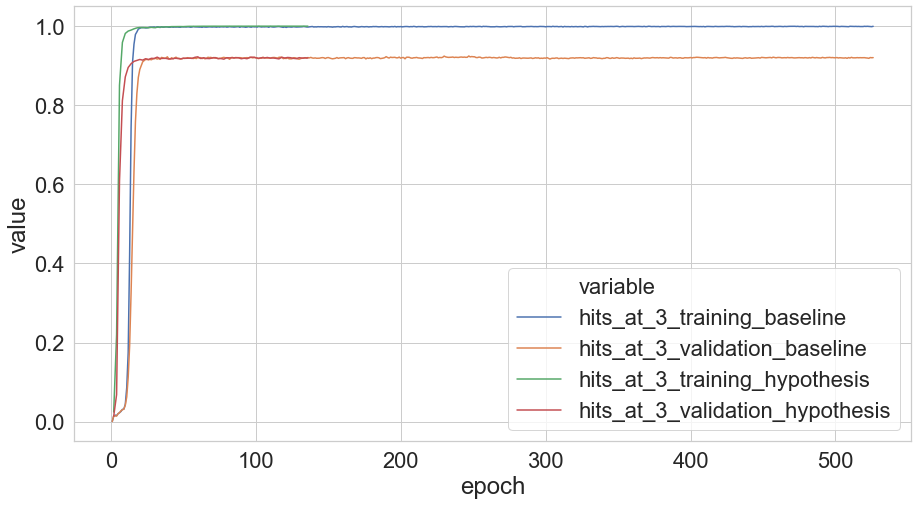

In [29]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3, ['epoch']))
plt.savefig('WN18_hits_at_3_Results.png', bbox_inches = "tight", format='PNG')

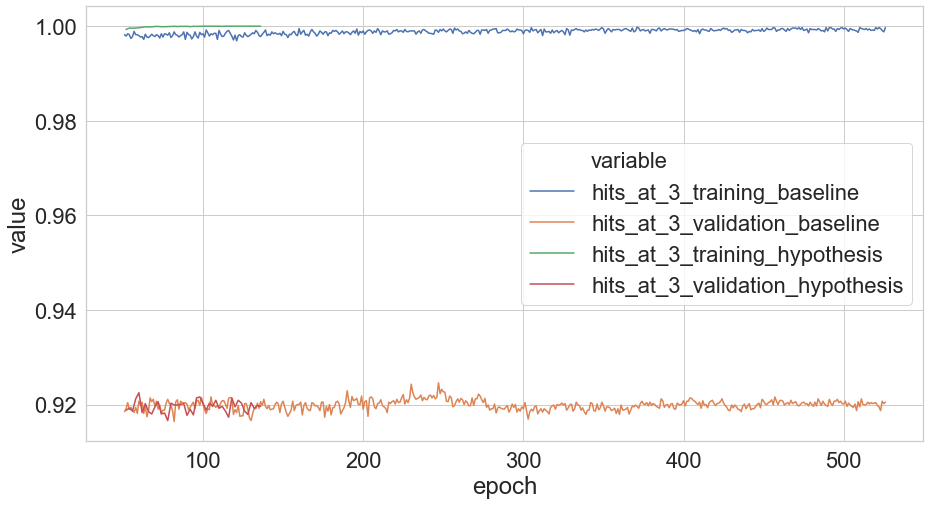

In [30]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_3[50:], ['epoch']))
plt.savefig('WN18_hits_at_3_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [31]:
path = get_path('hntn_train_validate_and_test_wn18_200d_hits_at_1.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_hits_at_1.csv'

In [32]:
results_hits_at_1 = pd.read_csv(path)
results_hits_at_1.head()

,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0.0002,0.0000,0.0000,NaN,NaN,NaN
1,0.0046,0.0058,0.0055,0.01413,0.0060,0.0072
2,0.0085,0.0065,0.0080,NaN,NaN,NaN
3,0.0061,0.0063,0.0069,0.15784,0.0462,0.0445
4,0.0075,0.0076,0.0086,NaN,NaN,NaN


In [33]:
results_hits_at_1 = results_hits_at_1.reset_index()
results_hits_at_1.head()

,index,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0,0.0002,0.0000,0.0000,NaN,NaN,NaN
1,1,0.0046,0.0058,0.0055,0.01413,0.0060,0.0072
2,2,0.0085,0.0065,0.0080,NaN,NaN,NaN
3,3,0.0061,0.0063,0.0069,0.15784,0.0462,0.0445
4,4,0.0075,0.0076,0.0086,NaN,NaN,NaN


In [34]:
results_hits_at_1 = results_hits_at_1.rename(columns={'index': 'epoch'})
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,0,0.0002,0.0000,0.0000,NaN,NaN,NaN
1,1,0.0046,0.0058,0.0055,0.01413,0.0060,0.0072
2,2,0.0085,0.0065,0.0080,NaN,NaN,NaN
3,3,0.0061,0.0063,0.0069,0.15784,0.0462,0.0445
4,4,0.0075,0.0076,0.0086,NaN,NaN,NaN


In [35]:
results_hits_at_1['epoch'] += 1
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_test_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis,hits_at_1_test_hypothesis
0,1,0.0002,0.0000,0.0000,NaN,NaN,NaN
1,2,0.0046,0.0058,0.0055,0.01413,0.0060,0.0072
2,3,0.0085,0.0065,0.0080,NaN,NaN,NaN
3,4,0.0061,0.0063,0.0069,0.15784,0.0462,0.0445
4,5,0.0075,0.0076,0.0086,NaN,NaN,NaN


In [36]:
results_hits_at_1_test = results_hits_at_1[['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis']]
results_hits_at_1_test.head()

,hits_at_1_test_baseline,hits_at_1_test_hypothesis
0,0.0000,NaN
1,0.0055,0.0072
2,0.0080,NaN
3,0.0069,0.0445
4,0.0086,NaN


In [37]:
results_hits_at_1_test.max()

hits_at_1_test_baseline      0.9470
hits_at_1_test_hypothesis    0.9436
dtype: float64

In [38]:
results_hits_at_1 = results_hits_at_1.drop(['hits_at_1_test_baseline', 'hits_at_1_test_hypothesis'], axis=1)
results_hits_at_1.head()

,epoch,hits_at_1_training_baseline,hits_at_1_validation_baseline,hits_at_1_training_hypothesis,hits_at_1_validation_hypothesis
0,1,0.0002,0.0000,NaN,NaN
1,2,0.0046,0.0058,0.01413,0.0060
2,3,0.0085,0.0065,NaN,NaN
3,4,0.0061,0.0063,0.15784,0.0462
4,5,0.0075,0.0076,NaN,NaN


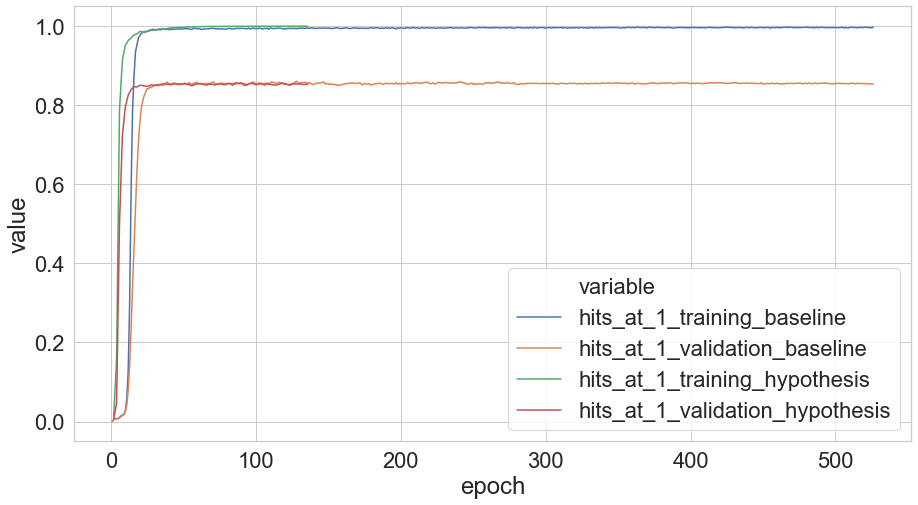

In [39]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1, ['epoch']))
plt.savefig('WN18_hits_at_1_Results.png', bbox_inches = "tight", format='PNG')

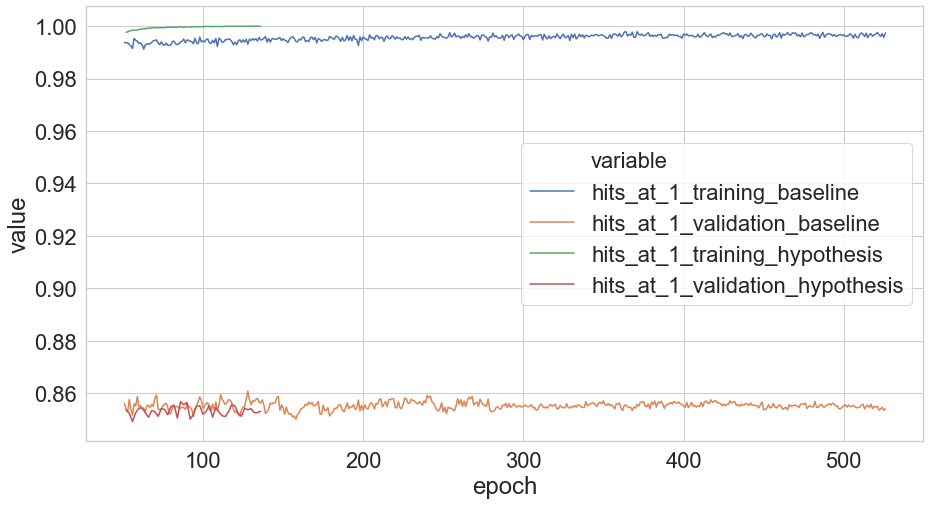

In [40]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_hits_at_1[50:], ['epoch']))
plt.savefig('WN18_hits_at_1_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [41]:
path = get_path('hntn_train_validate_and_test_wn18_200d_mean_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_mean_rank.csv'

In [42]:
results_mean_rank = pd.read_csv(path)
results_mean_rank.head()

,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,16039.2498,17387.0054,17735.8406,NaN,NaN,NaN
1,14174.9759,16227.3460,16566.8188,9871.96161,15062.1363,15087.2779
2,12800.8523,15519.1624,15860.8672,NaN,NaN,NaN
3,11688.6667,15381.2500,15646.1670,1860.62669,5842.5186,5661.8075
4,11392.7077,15191.1117,15394.3498,NaN,NaN,NaN


In [43]:
results_mean_rank = results_mean_rank.reset_index()
results_mean_rank.head()

,index,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,0,16039.2498,17387.0054,17735.8406,NaN,NaN,NaN
1,1,14174.9759,16227.3460,16566.8188,9871.96161,15062.1363,15087.2779
2,2,12800.8523,15519.1624,15860.8672,NaN,NaN,NaN
3,3,11688.6667,15381.2500,15646.1670,1860.62669,5842.5186,5661.8075
4,4,11392.7077,15191.1117,15394.3498,NaN,NaN,NaN


In [44]:
results_mean_rank = results_mean_rank.rename(columns={'index': 'epoch'})
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,0,16039.2498,17387.0054,17735.8406,NaN,NaN,NaN
1,1,14174.9759,16227.3460,16566.8188,9871.96161,15062.1363,15087.2779
2,2,12800.8523,15519.1624,15860.8672,NaN,NaN,NaN
3,3,11688.6667,15381.2500,15646.1670,1860.62669,5842.5186,5661.8075
4,4,11392.7077,15191.1117,15394.3498,NaN,NaN,NaN


In [45]:
results_mean_rank['epoch'] += 1
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_test_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis,mean_rank_test_hypothesis
0,1,16039.2498,17387.0054,17735.8406,NaN,NaN,NaN
1,2,14174.9759,16227.3460,16566.8188,9871.96161,15062.1363,15087.2779
2,3,12800.8523,15519.1624,15860.8672,NaN,NaN,NaN
3,4,11688.6667,15381.2500,15646.1670,1860.62669,5842.5186,5661.8075
4,5,11392.7077,15191.1117,15394.3498,NaN,NaN,NaN


In [46]:
results_mean_rank_test = results_mean_rank[['mean_rank_test_baseline', 'mean_rank_test_hypothesis']]
results_mean_rank_test.head()

,mean_rank_test_baseline,mean_rank_test_hypothesis
0,17735.8406,NaN
1,16566.8188,15087.2779
2,15860.8672,NaN
3,15646.1670,5661.8075
4,15394.3498,NaN


In [47]:
results_mean_rank_test.min()

mean_rank_test_baseline      510.2483
mean_rank_test_hypothesis    598.6171
dtype: float64

In [48]:
results_mean_rank = results_mean_rank.drop(['mean_rank_test_baseline', 'mean_rank_test_hypothesis'], axis=1)
results_mean_rank.head()

,epoch,mean_rank_training_baseline,mean_rank_validation_baseline,mean_rank_training_hypothesis,mean_rank_validation_hypothesis
0,1,16039.2498,17387.0054,NaN,NaN
1,2,14174.9759,16227.3460,9871.96161,15062.1363
2,3,12800.8523,15519.1624,NaN,NaN
3,4,11688.6667,15381.2500,1860.62669,5842.5186
4,5,11392.7077,15191.1117,NaN,NaN


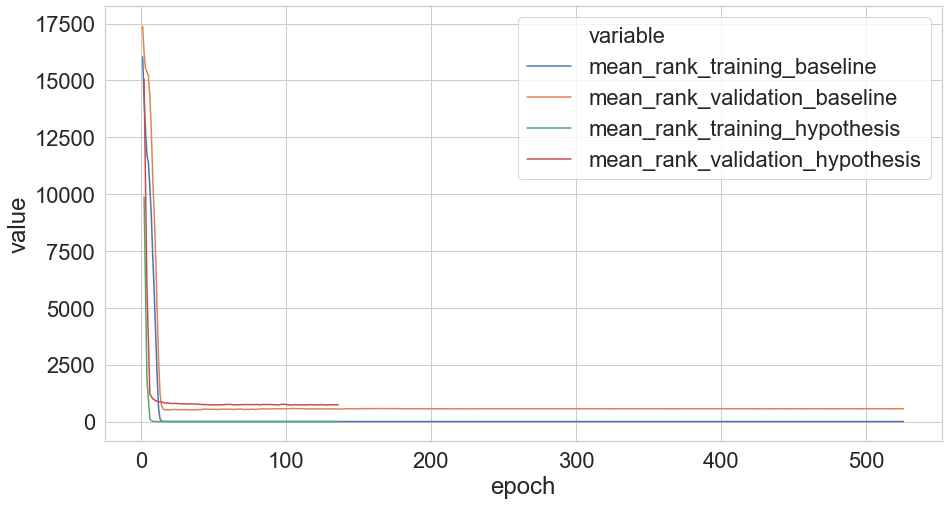

In [49]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank, ['epoch']))
plt.savefig('WN18_mean_rank_Results.png', bbox_inches = "tight", format='PNG')

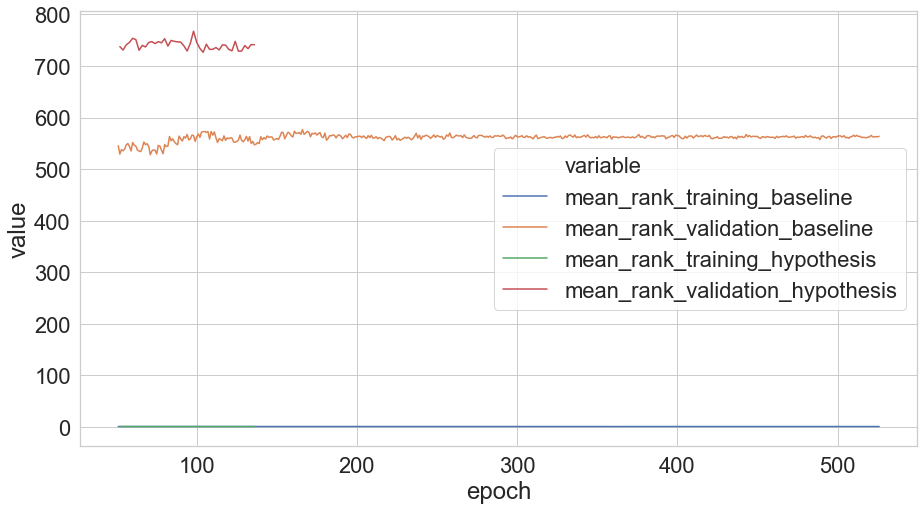

In [50]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_rank[50:], ['epoch']))
plt.savefig('WN18_mean_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')

In [51]:
path = get_path('hntn_train_validate_and_test_wn18_200d_mean_reciprocal_rank.csv', 'results')
path

'/Users/luyolomagangane/workspace/HypER-Regularised-Relations/results/hntn_train_validate_and_test_wn18_200d_mean_reciprocal_rank.csv'

In [52]:
results_mean_reciprocal_rank = pd.read_csv(path)
results_mean_reciprocal_rank.head()

,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0.000786,0.000502,0.000465,NaN,NaN,NaN
1,0.012427,0.013989,0.013580,0.023832,0.013478,0.013985
2,0.017554,0.015896,0.015928,NaN,NaN,NaN
3,0.015791,0.015529,0.015431,0.206938,0.064788,0.063260
4,0.019341,0.019498,0.019733,NaN,NaN,NaN


In [53]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.reset_index()
results_mean_reciprocal_rank.head()

,index,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0,0.000786,0.000502,0.000465,NaN,NaN,NaN
1,1,0.012427,0.013989,0.013580,0.023832,0.013478,0.013985
2,2,0.017554,0.015896,0.015928,NaN,NaN,NaN
3,3,0.015791,0.015529,0.015431,0.206938,0.064788,0.063260
4,4,0.019341,0.019498,0.019733,NaN,NaN,NaN


In [54]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.rename(columns={'index': 'epoch'})
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,0,0.000786,0.000502,0.000465,NaN,NaN,NaN
1,1,0.012427,0.013989,0.013580,0.023832,0.013478,0.013985
2,2,0.017554,0.015896,0.015928,NaN,NaN,NaN
3,3,0.015791,0.015529,0.015431,0.206938,0.064788,0.063260
4,4,0.019341,0.019498,0.019733,NaN,NaN,NaN


In [55]:
results_mean_reciprocal_rank['epoch'] += 1
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis,mean_reciprocal_rank_test_hypothesis
0,1,0.000786,0.000502,0.000465,NaN,NaN,NaN
1,2,0.012427,0.013989,0.013580,0.023832,0.013478,0.013985
2,3,0.017554,0.015896,0.015928,NaN,NaN,NaN
3,4,0.015791,0.015529,0.015431,0.206938,0.064788,0.063260
4,5,0.019341,0.019498,0.019733,NaN,NaN,NaN


In [56]:
results_mean_reciprocal_rank_test = results_mean_reciprocal_rank[['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis']]
results_mean_reciprocal_rank_test.head()

,mean_reciprocal_rank_test_baseline,mean_reciprocal_rank_test_hypothesis
0,0.000465,NaN
1,0.013580,0.013985
2,0.015928,NaN
3,0.015431,0.063260
4,0.019733,NaN


In [57]:
results_mean_reciprocal_rank_test.max()

mean_reciprocal_rank_test_baseline      0.950545
mean_reciprocal_rank_test_hypothesis    0.948020
dtype: float64

In [58]:
results_mean_reciprocal_rank = results_mean_reciprocal_rank.drop(['mean_reciprocal_rank_test_baseline', 'mean_reciprocal_rank_test_hypothesis'], axis=1)
results_mean_reciprocal_rank.head()

,epoch,mean_reciprocal_rank_training_baseline,mean_reciprocal_rank_validation_baseline,mean_reciprocal_rank_training_hypothesis,mean_reciprocal_rank_validation_hypothesis
0,1,0.000786,0.000502,NaN,NaN
1,2,0.012427,0.013989,0.023832,0.013478
2,3,0.017554,0.015896,NaN,NaN
3,4,0.015791,0.015529,0.206938,0.064788
4,5,0.019341,0.019498,NaN,NaN


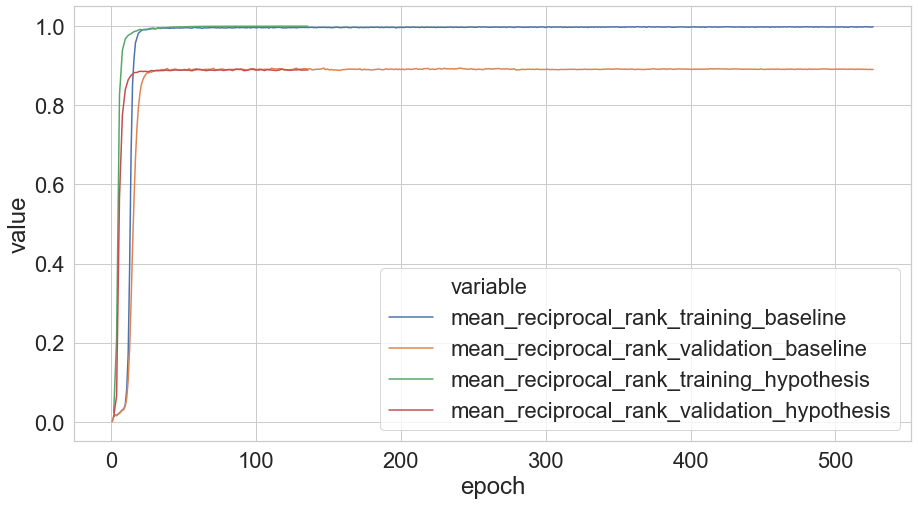

In [59]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank, ['epoch']))
plt.savefig('WN18_mean_reciprocal_rank_Results.png', bbox_inches = "tight", format='PNG')

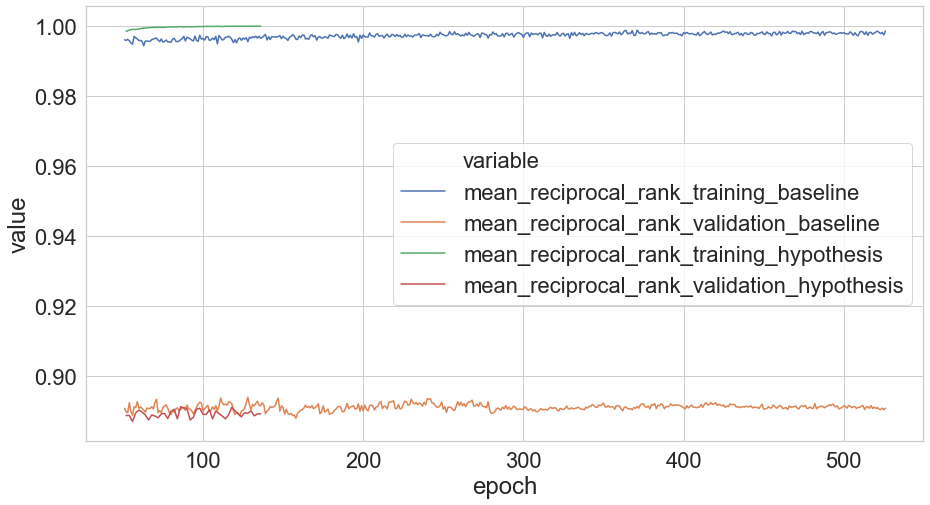

In [60]:
plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=2) 
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_mean_reciprocal_rank[50:], ['epoch']))
plt.savefig('WN18_mean_reciprocal_rank_Results_Clipped.png', bbox_inches = "tight", format='PNG')